# 5. Пороговая обработка изображений

## 5.1. Простой порог

In [1]:
import cv2 as cv
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

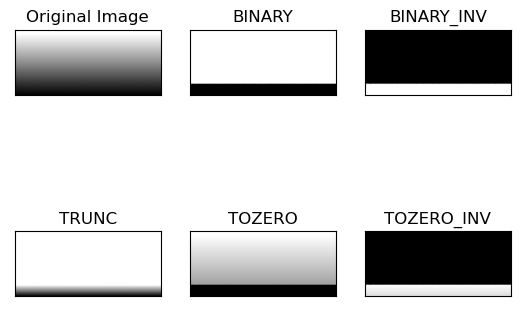

In [2]:
img = cv.imread("img/gradient.png", 0)
ret, thresh1 = cv.threshold(img, 135, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 135, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 135, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 135, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 135, 255, cv.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])

plt.show()


## 5.2. Адаптивный порог


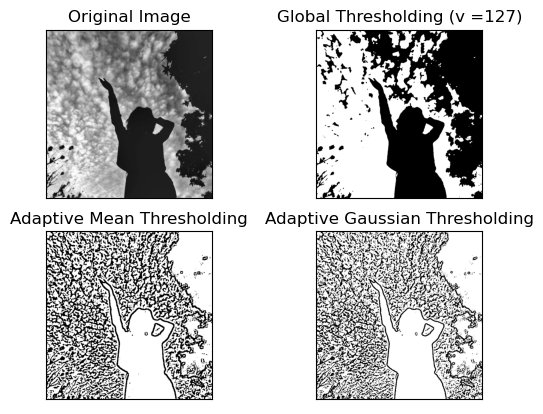

In [3]:
img = cv.imread('img/z2.jpg', 0)
img = cv.medianBlur(img, 5)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

images = [img, th1, th2, th3]
titles = ['Original Image', 'Global Thresholding (v =127)', 'Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding']

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


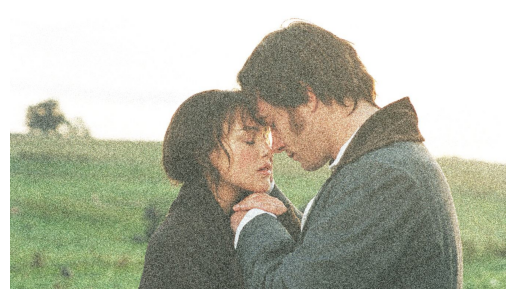

In [4]:
image = Image.open('img/z3.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("img/z3_.png", "JPEG")

img = cv.imread("img/z3_.png", 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
plt.axis('off');

## 5.3. Бинаризация Оцу

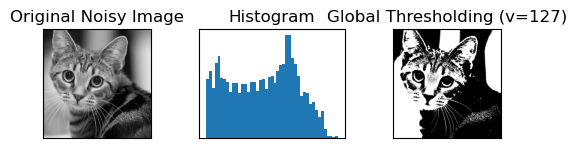

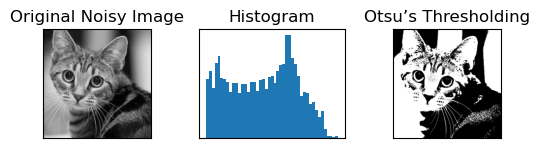

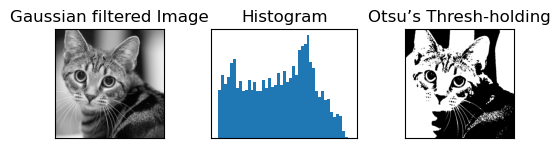

In [5]:
img = cv.imread('img/cat.jpg', 0)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)', 'Original Noisy Image', 'Histogram',
          'Otsu’s Thresholding', 'Gaussian filtered Image', 'Histogram', 'Otsu’s Thresh-holding']

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]),
    plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 45)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]),
    plt.yticks([])
    plt.show()